In [ ]:
import random
import matplotlib.pyplot as plt

def graph(n, k):
        value = random.random()
        p = value

        subsets = [[] for _ in range(k)]
        for i in range(n):
            subsets[i % k].append(i)
        edges = set()
        for i in range(n):
            for j in range(i + 1, n):
                if i in subsets[j % k] or j in subsets[i % k]:
                    continue
                elif random.random() < p:
                    edges.add((i, j))
        graph = {i: [] for i in range(n)}
        for u, v in edges:
            graph[u].append(v)
            graph[v].append(u)

        return graph

def firstfit_min_colors(graph):
    
    colors = {}
    for vertex in graph:
        used_colors = set(colors.get(neighbor) for neighbor in graph[vertex] if neighbor in colors)
        available_colors = set(range(len(graph))) - used_colors
        if available_colors:
            colors[vertex] = min(available_colors)
        else:
            colors[vertex] = len(graph)

    return colors

ratios = {2: [], 3: [], 4: []}
for k in [2, 3, 4]:
    for n in [550, 100, 200, 400, 600, 800, 1000, 1400, 1600]:
        N = 1000
        competitive_ratio_sum = 0
        
        for i in range(N):
            G = graph(n, k)
            x = firstfit_min_colors(G)
            colors_used = len(set(x.values()))
            optimal_colors = k
            competitive_ratio = colors_used / optimal_colors
            competitive_ratio_sum += competitive_ratio
        
        average_ratio = competitive_ratio_sum / N
        ratios[k].append(average_ratio)


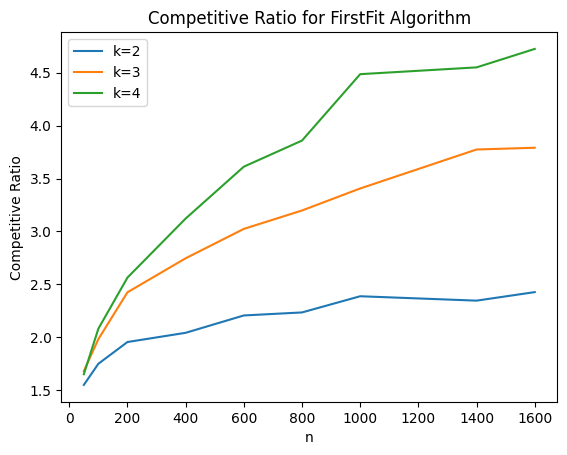

In [ ]:
for k in [2, 3, 4]:
    plt.plot([50, 100, 200, 400, 600, 800, 1000, 1400, 1600], ratios[k], label=f'k={k}')
    
plt.legend()
plt.title('Competitive Ratio for FirstFit Algorithm')
plt.xlabel('n')
plt.ylabel('Competitive Ratio')
plt.show()
